<a href="https://colab.research.google.com/github/ewattudo/gis/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1 - Erick Watt-Udogu


# Setup and Upload files
Run this for data and setup code.

In [ ]:
!pip install geopandas==1.0.1
import pandas as pd
import urllib.request

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

## Undergrad Student Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/main/UG%20States.csv", "UGStates.csv")

('UGStates.csv', <http.client.HTTPMessage at 0x7bf4b35ab2b0>)

In [ ]:
#ran into an issue creating this dataframe and used the embedded help.
UGS = pd.read_csv('UGStates.csv')

## World Map Data

In [ ]:
world=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp') #load the shapefile with gpd as njC

## Workbook
This is code that helps me to perform operations. I don't want to delete it, but it's not useful to share externally.

## Cleaning US Map

In [ ]:
#I just need to see the names in this field to determine how to create a subset map
print(US.NAME.unique())

['Mississippi' 'North Carolina' 'Oklahoma' 'Virginia' 'West Virginia'
 'Louisiana' 'Michigan' 'Massachusetts' 'Idaho' 'Florida' 'Nebraska'
 'Washington' 'New Mexico' 'Puerto Rico' 'South Dakota' 'Texas'
 'California' 'Alabama' 'Georgia' 'Pennsylvania' 'Missouri' 'Colorado'
 'Utah' 'Tennessee' 'Wyoming' 'New York' 'Kansas' 'Alaska' 'Nevada'
 'Illinois' 'Vermont' 'Montana' 'Iowa' 'South Carolina' 'New Hampshire'
 'Arizona' 'District of Columbia' 'American Samoa'
 'United States Virgin Islands' 'New Jersey' 'Maryland' 'Maine' 'Hawaii'
 'Delaware' 'Guam' 'Commonwealth of the Northern Mariana Islands'
 'Rhode Island' 'Kentucky' 'Ohio' 'Wisconsin' 'Oregon' 'North Dakota'
 'Arkansas' 'Indiana' 'Minnesota' 'Connecticut']


In [ ]:
#Renaming the NAME field in the lower dataframe.
lower = lower.rename(columns={'STATE':'STATE_FULL','STUSPS':'STATE'})

# Merging

In [107]:
#Merging Lower with UG Data
USUGMAP = pd.merge(lower, UGS, on='STATE',how='outer',indicator=True)
USUGMAP[['STATE','Total','_merge']]#looks good, we don't have UGs for each state.

,STATE,Total,_merge
0,MS,NaN,left_only
1,NC,1.0,both
2,OK,NaN,left_only
3,VA,NaN,left_only
4,WV,NaN,left_only
5,LA,NaN,left_only
6,MI,1.0,both
7,MA,2.0,both
8,ID,NaN,left_only
9,FL,1.0,both


In [113]:
USUGMAP['Total'] = USUGMAP['Total'].fillna(0)
USUGMAP[['STATE','Total','_merge']]

,STATE,Total,_merge
0,MS,0.0,left_only
1,NC,1.0,both
2,OK,0.0,left_only
3,VA,0.0,left_only
4,WV,0.0,left_only
5,LA,0.0,left_only
6,MI,1.0,both
7,MA,2.0,both
8,ID,0.0,left_only
9,FL,1.0,both


In [ ]:
USUGMAP2 = pd.merge(lower, UGS, on='STATE',how='inner',indicator=False)

In [104]:
USUGMAP2['Total'] = USUGMAP2['Total'].fillna(0)
USUGMAP2[['STATE','Total']]

,STATE,Total
0,NC,1
1,MI,1
2,MA,2
3,FL,1
4,TX,3
5,CA,3
6,PA,28
7,TN,8
8,NY,8
9,SC,2


In [108]:
USUGMAP2['Total'] = USUGMAP2['Total'].replace(np.nan, 0)

<Axes: >

[]

[]

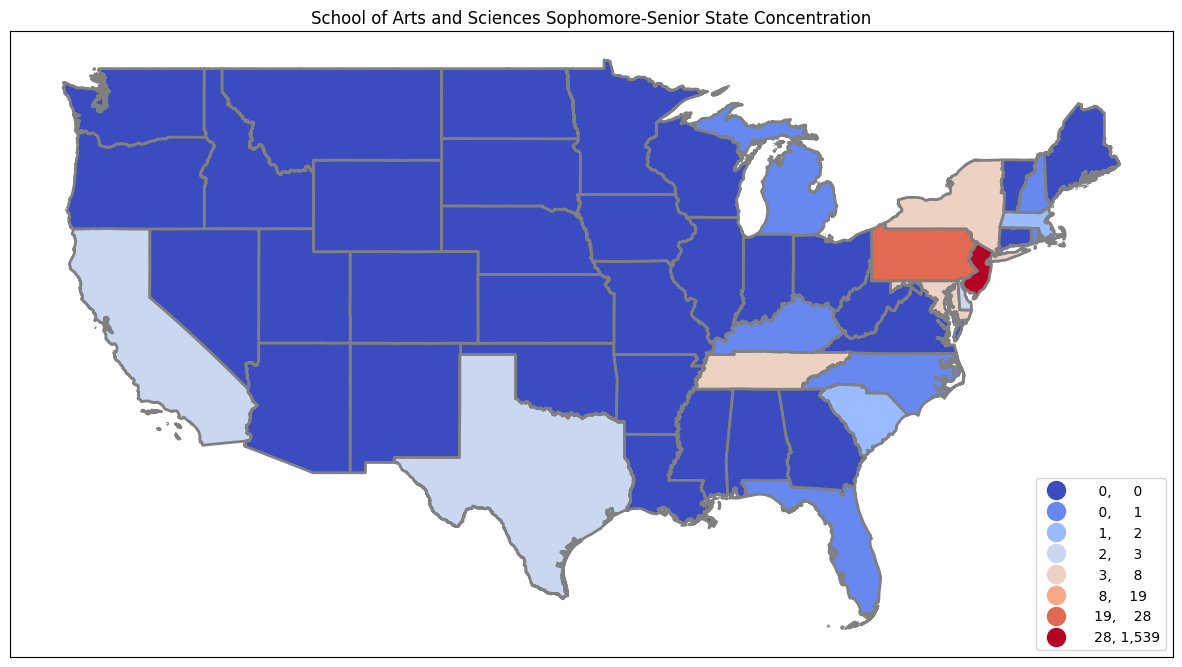

In [126]:
fig, ax = plt.subplots(1, figsize=(15,50))
USUGMAP.plot(ax=ax,column='Total',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=8, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("School of Arts and Sciences Sophomore-Senior State Concentration")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

# Maps

## World Maps
Since the Graduate School's catchment area is global, I want to experiment with maps displaying political boundaries worldwide. Below are two maps with different upload styles. The first is less detailed than the second, which involves downloading from a zip file rather than directly to a shapefile.

<Axes: >

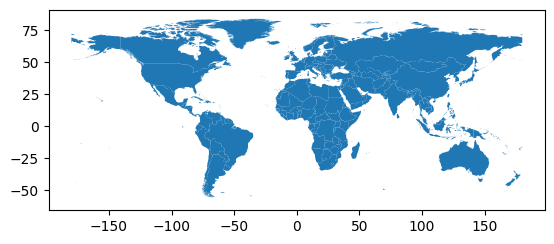

In [ ]:
world.plot()

In [ ]:
#I want to see if I can find one with country names
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

<Axes: >

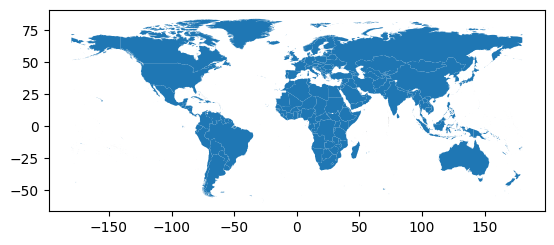

In [ ]:
#No country names that I can see, but this file seems to be m0re detailed I can see some bodies of water. I also wanted to see if I can upload from a Zip rather than directly to the shapefile.
Countries.plot()

In [ ]:
#I want to see if I can find one with country names
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

## US Maps
Here I wanted to look at US maps.

### US Map with States

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

<Axes: >

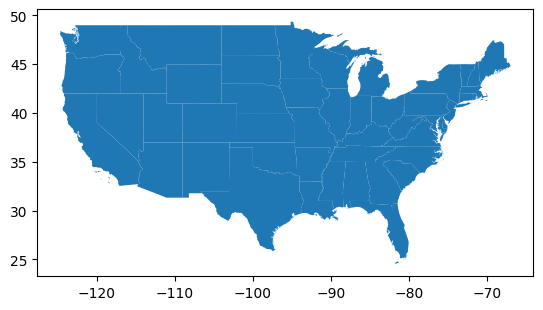

In [ ]:
# I just want the lower 48 since we don't have students in states like Alaska
lower = US[~US['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
lower.plot()

<Axes: >

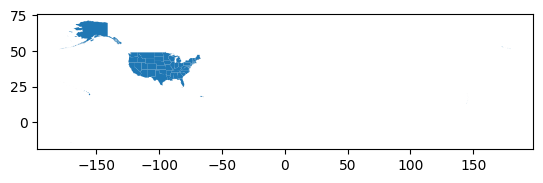

In [ ]:
US.plot()

### US Map with Universities
Here I just wanted to find some data that wasn't just boundaries like all the other plots. This plots all the universities in the US. I manipulated the plot size a bit but I don't think the data is useful other than to show that there are a large number of universities in the US.

In [ ]:
Uni=gpd.read_file('https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities@public/exports/shp')

<Axes: >

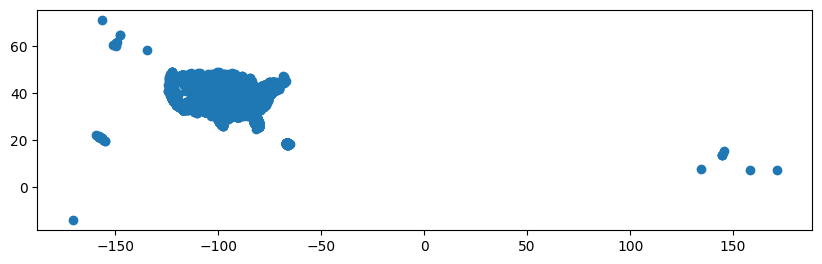

In [ ]:
fig, ax = plt.subplots(figsize=(10, 50))
Uni.plot(ax=ax)

### PA Universities
The previous map is unusable, so I want to look at a smaller geography. Since the map file has NJ, I will look at universities in PA.

Despite a lack of political boundaries, it is clear there are a large number of universities in the Philadelphia area. Not surprising but interesting to see visually.

In [ ]:
PA_Uni=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities/exports/shp?lang=en&refine=state%3A%22PA%22&timezone=America%2FNew_York')

<Axes: >

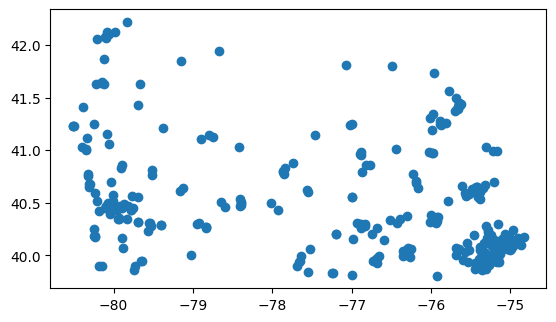

In [ ]:
PA_Uni.plot()

In [ ]:
Philly_Uni=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities/exports/shp?lang=en&refine=state%3A%22PA%22&refine=city%3A%22PHILADELPHIA%22&timezone=America%2FNew_York')

#### Philadelpha Universities
I decided to plot just the universities in Philadelphia county. I am not sure how useful this is by itself.

However, this exercise is interesting because I often compare Philadelpha university competition against Idaho anecdotally and it's not an unfair comparison. There are 36 schools in Phiadelpha county but only 41 universities in the entire state of Idaho. In the future, I am interested in visualizing this comparison in a useful way.

<Axes: >

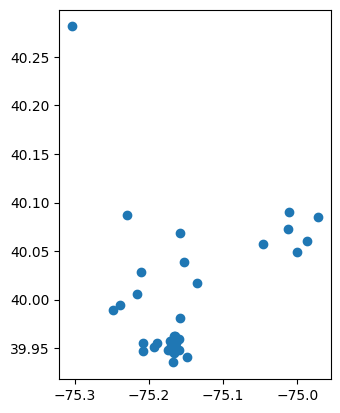

In [ ]:
Philly_Uni.plot()